# Checking edges in an image using Prewitt operator and Hough transform
Steps for this method
1. Detecting edges using prewitt operator(Completed ✅)
2. Perform Hough transformation(Completed ✅)

### Generate pixelated dataset with different levels
starting from 16 till 512 with steps of 16

In [ ]:
import os
from PIL import Image
from glob import glob

# Open image
images = glob("./images/dataset/*.JPG")
for image in images:
    # Getting individual image
    img = Image.open(image)
    dim_amount = 16
    while dim_amount <= 512:
        imgSmall = img.resize((dim_amount, dim_amount), resample=Image.Resampling.BILINEAR)
        result = imgSmall.resize(img.size, Image.Resampling.NEAREST)

        filename = image.split("\\")[1].split(".")[0]
        directory = f"./images/pixelated-dataset-{dim_amount}"

        # Check whether given directory is exists
        if not os.path.exists(directory):
            os.makedirs(directory)

        result.save(f"./images/pixelated-dataset-{dim_amount}/{filename}-pixelated.JPG")

        # Updating the dimension amount
        dim_amount = dim_amount + 16

In [24]:
import cv2
import numpy as np
import matplotlib.pylab as plt

def get_horizontal_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Conversion between BGR -> RGB
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Checking for horizontal lines
    kernel_horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    edges_horizontal = cv2.filter2D(img, -1, kernel_horizontal)

    return edges_horizontal

def get_vertical_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Converstion between BGR -> RGB
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Checking for vertical lines
    kernel_vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    edges_vertical = cv2.filter2D(img, -1, kernel_vertical)

    return edges_vertical

def get_vertical_and_horizontal_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Horizontal and vertical images filters
    kernel_horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    edges_horizontal = cv2.filter2D(img, -1, kernel_horizontal)
    edges_vertical = cv2.filter2D(img, -1, kernel_vertical)

    return edges_horizontal + edges_vertical

In [29]:
import cv2
import math

def get_lines(img):
    horizontal_count, vertical_count = 0, 0
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    lines = cv2.HoughLines(img, 1, np.pi / 180, 50, None, 50, 10)

    # Generating image with only horizontal and vertical lines
    for lin_index in range(len(lines)):
        p = lines[lin_index][0]
        dis, angle = p[0], p[1]

        height, width = img.shape
        print(f"{height} - {width}")

        # Accpeting only horizontal and vertical lines
        if angle == 0:
            # Given lines is a horizontal line
            horizontal_count += 1
        elif 1.56 <=  angle <= 1.58:
            # Given line is a vertical line
            vertical_count += 1
        else:
            continue

        a = math.cos(angle)
        b = math.sin(angle)

        x0 = a * dis
        y0 = b * dis

        pt1 = (int(x0 + 413*(-b)), int(y0 + 531*(a)))
        pt2 = (int(x0 - 413*(-b)), int(y0 - 531*(a)))

        cv2.line(img_color, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

    return [img_color, vertical_count, horizontal_count]


1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827
1063 - 827

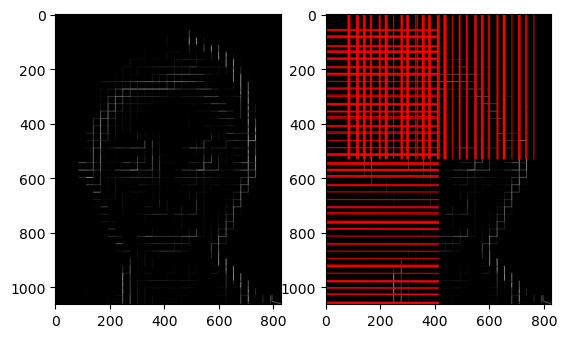

In [30]:
import matplotlib.pyplot as plt

image_path = "./images/Passport-Image-[2].jpg"
# image_path = "./images/dataset/N230102012.JPG"

def get_icao14(image_path, show=False):
    edges_img = get_vertical_and_horizontal_edges(image_path)
    [lines_img, vertical_count, horizontal_count] = get_lines(edges_img)

    # Showing the results if necessary
    if show:
        plt.subplot(1, 2, 1)
        plt.imshow(edges_img, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.imshow(lines_img)

    # Calculation icao14 -> Inverse propational of horizontal and vertical edges
    return [1 / (horizontal_count + vertical_count), horizontal_count, vertical_count]

print(get_icao14(image_path, show=True))


In [27]:
# Generating ICAO14 values for whole dataset
import csv
from glob import glob
from itertools import product

images = glob("./images/dataset/*.JPG")[:100]
pixelations = [dim for dim in range(16, 513, 16)]

# Writing to the csv file
csv_file = open("icao12-results.csv", "w")
current_count = 1

tot_images = product(images, pixelations)
total_count = len(images) * len(pixelations)


for image, dim in tot_images:
    image = image.split("\\")[-1]
    image_path = f"./images/pixelated-dataset-{dim}/{image.split('.')[0]}-pixelated.{image.split('.')[-1]}"


    [icao14, horizontal_count, vertical_count] = get_icao14(image_path, show=False)
    csv_file.writelines("{},{},{},{},{}\n".format(image, dim, horizontal_count, vertical_count, icao14))

    current_count += 1
    print(f"{image} - {dim} - {current_count/total_count * 100}%")

csv_file.close()


N230101660.JPG - 16 - 0.0625%
N230101660.JPG - 32 - 0.09375%
N230101660.JPG - 48 - 0.125%
N230101660.JPG - 64 - 0.15625%
N230101660.JPG - 80 - 0.1875%
N230101660.JPG - 96 - 0.21875000000000003%
N230101660.JPG - 112 - 0.25%
N230101660.JPG - 128 - 0.28125%
N230101660.JPG - 144 - 0.3125%
N230101660.JPG - 160 - 0.34375%
N230101660.JPG - 176 - 0.375%
N230101660.JPG - 192 - 0.40625%
N230101660.JPG - 208 - 0.43750000000000006%
N230101660.JPG - 224 - 0.46875%
N230101660.JPG - 240 - 0.5%
N230101660.JPG - 256 - 0.53125%
N230101660.JPG - 272 - 0.5625%
N230101660.JPG - 288 - 0.59375%
N230101660.JPG - 304 - 0.625%
N230101660.JPG - 320 - 0.65625%
N230101660.JPG - 336 - 0.6875%
N230101660.JPG - 352 - 0.71875%
N230101660.JPG - 368 - 0.75%
N230101660.JPG - 384 - 0.78125%
N230101660.JPG - 400 - 0.8125%
N230101660.JPG - 416 - 0.84375%
N230101660.JPG - 432 - 0.8750000000000001%
N230101660.JPG - 448 - 0.9062499999999999%
N230101660.JPG - 464 - 0.9375%
N230101660.JPG - 480 - 0.96875%
N230101660.JPG - 496 - 

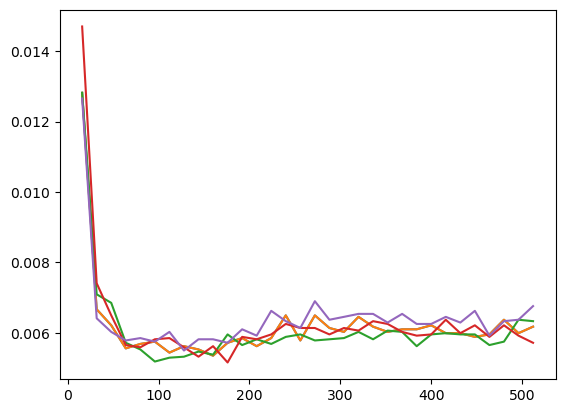

In [28]:
# Plotting the graphs for icao14 values
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

image_names = ["N230101899.JPG", "N230101899.JPG", "N230101959.JPG", "N230101841.JPG", "N230101780.JPG"]

def generate_plot(image_name):
    myData = genfromtxt("icao12-results.csv", dtype=str, delimiter=",")

    elements = []
    for element in myData:
        if element[0] == image_name: elements.append(element)

    xValues, yValues = [], []
    for element in elements:
        xValues.append(int(element[1]))
        yValues.append(float(element[-1]))

    plt.plot(xValues, yValues, '-')

for image in image_names:
    generate_plot(image)